# Analytics Engineer Case - Solution

By Joseph Oladokun

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
# Read the datasets
adspend = pd.read_csv('data/adspend.csv')
installs = pd.read_csv('data/installs.csv')
payouts = pd.read_csv('data/payouts.csv')
revenue = pd.read_csv('data/revenue.csv')

## Data Exploration

Data exploration is the process of understanding and analyzing a dataset to extract insights and knowledge from it. The goal of data exploration is to understand the dataset, identify patterns, trends, and anomalies that can impact and inform further analysis or decision-making.

In [3]:
# Preview the Dataset
revenue.head()

,install_id,event_date,value_usd
0,213197bd66cd889d103ab9059709458e49808214837508...,2022-12-16,1.5800
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,2022-12-21,6.7500
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.6200
3,9505bab0515c96b7d8c9a5aeb1fb28ae397b23badb2f03...,2022-12-20,0.0015
4,fa69bdded229f9ebb18290559d77cefbd8e5ad83d74b86...,2022-12-16,0.5400


In [57]:
revenue['value_usd'].sum()

418845.24711638066

In [4]:
# Check the shape of the dataset
f'The dataset has {revenue.shape[0]} rows and {revenue.shape[1]} columns'


'The dataset has 2629314 rows and 3 columns'

In [5]:
# Check the data types of each column
revenue.dtypes


install_id     object
event_date     object
value_usd     float64
dtype: object

In [6]:
# Check the basic statistics of numerical columns
revenue.describe()

,value_usd
count,2.629314e+06
mean,1.592983e-01
std,1.510104e+00
min,-5.813404e+01
25%,1.000000e-05
50%,4.000000e-05
75%,8.000000e-04
max,5.827000e+01


In [7]:
# Check the number of missing values in each column
revenue.isnull().sum()

install_id    0
event_date    0
value_usd     0
dtype: int64

## Revenue by Month

Revenue by month is a measure of the total amount of revenue generated by the company month on month basis. Revenue is the income earned by the company whenever a user downloads any of our partner apps. By tracking revenue on a monthly basis, a business can monitor trends and identify any changes or patterns in its revenue stream over time. This information can be used to make strategic decisions and plan for future growth and development.

In [8]:
# convert event_date to datetime format
revenue['event_date'] = pd.to_datetime(revenue['event_date'])
revenue['month_year'] = revenue['event_date'].dt.to_period('M')
monthly_revenue = revenue.groupby('month_year')['value_usd'].sum().reset_index()

# Convert 'month_year' column to datetime format
monthly_revenue['month_year'] = monthly_revenue['month_year'].dt.strftime('%b-%Y')

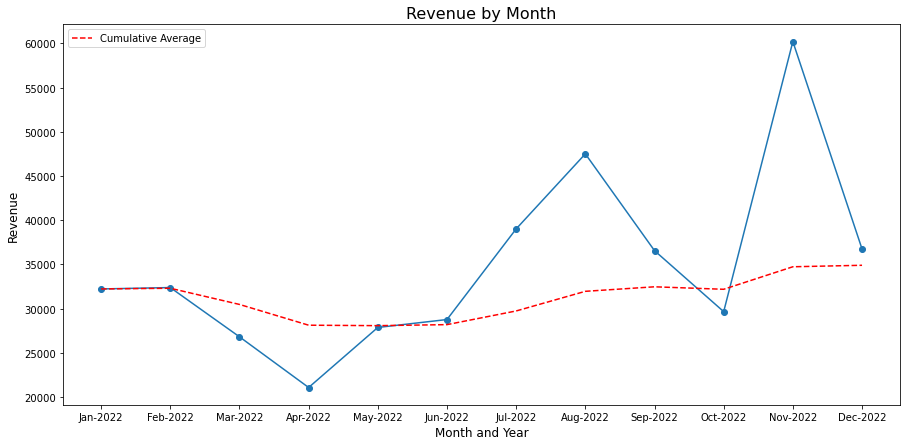

In [9]:
# Calculate cumulative average Payouts
cumulative_avg = monthly_revenue['value_usd'].cumsum() / (monthly_revenue.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(monthly_revenue['month_year'], monthly_revenue['value_usd'], marker='o')

# Add cumulative average line
ax.plot(monthly_revenue['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('Revenue by Month', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)

ax.legend()

plt.show()

The presented chart depicts the monthly cumulative average of revenue, indicating a gradual upward trend. This suggests that the revenue growth rate is steady but slow. The unstable month-on-month revenue is the reason for the slow growth of the cumulative average revenue. I would advise that this growth rate may not be sufficient for a startup and that we should prioritize strategies to boost revenue growth. It is also important to consider additional metrics in conjunction with this trend to obtain a more comprehensive understanding of the business's growth rate.

## Payouts by Month

Users that downloaded the company's products are prompted to download and play partner apps to gain coins, which in turn, they can use to cashout money prizes, the cashout money prizes can affect our baseline if the user acquired is considered ‘low quality’ and the if the ‘commercial conditions’ are not favourable.

In [10]:
payouts.head()

,install_id,event_date,value_usd
0,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254376
1,7488c7b0f3d25cea61e435ea2aa346d3bbf1b946b94b1f...,2022-12-28,0.361216
2,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.359006
3,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416
4,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416


In [11]:
# convert event_date to datetime format
payouts['event_date'] = pd.to_datetime(payouts['event_date'])
payouts['month_year'] = payouts['event_date'].dt.to_period('M')
monthly_payouts = payouts.groupby('month_year')['value_usd'].sum().reset_index()

# Convert 'month_year' column to datetime format
monthly_payouts['month_year'] = monthly_payouts['month_year'].dt.strftime('%b-%Y')

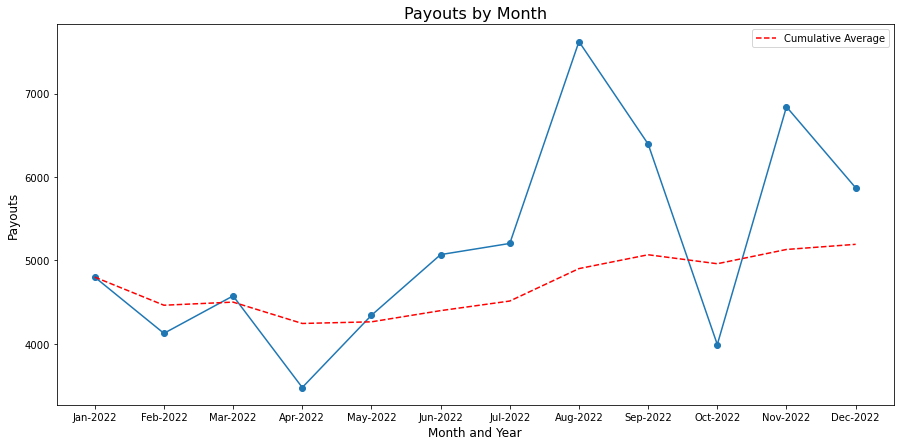

In [12]:
# Calculate cumulative average Payouts
cumulative_avg = monthly_payouts['value_usd'].cumsum() / (monthly_payouts.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(monthly_payouts['month_year'], monthly_payouts['value_usd'], marker='o')

# Add cumulative average line
ax.plot(monthly_payouts['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('Payouts by Month', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('Payouts', fontsize=12)

ax.legend()


plt.show()


Unsurprisingly, There seems to be high correlation between Payouts and Revenue, to get the full context, we will need to look at how payouts affect the profit margins as we proceed

## Installs Per Month

Whenever a user downloads any of our partner apps, we also get paid a fee for acquiring a user for that partner app, so Installs per month can have implact on the company's revenue. Installs per month is a metric that represents the number of times a mobile application was installed by users in a given month.

In [13]:
installs.head()

,install_id,country_id,app_id,network_id,event_date,device_os_version
0,6b168a9f7a13119b87bfeb834d159f6879ff000205cb27...,1,174,26,2022-12-13,10
1,218ecd973c988fe76dfd247f92e9317485010844163a51...,1,174,60,2022-12-14,10
2,f67c1382fc3af8a24cb6f23bff381279d582eb67d4043e...,17,122,26,2022-12-30,11
3,afe4dc7c1663fba7ba3bc7cf6a308c38c1cb409d253f7f...,1,121,1111,2022-12-30,8.0.0
4,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11


In [14]:
# Convert event_date to datetime format
installs['event_date'] = pd.to_datetime(installs['event_date'])

# Group the data by month and get the total installs per month
monthly_installs = installs.groupby(pd.Grouper(key='event_date', freq='M')).size().reset_index(name='total_installs')

# Rename the event_date column to month_year
monthly_installs = monthly_installs.rename(columns={'event_date': 'month_year'})

# Extract the month and year from the month_year column
monthly_installs['month_year'] = monthly_installs['month_year'].dt.strftime('%b-%Y')


In [15]:
monthly_installs.head()

,month_year,total_installs
0,Jan-2022,21224
1,Feb-2022,14816
2,Mar-2022,13518
3,Apr-2022,11342
4,May-2022,13424


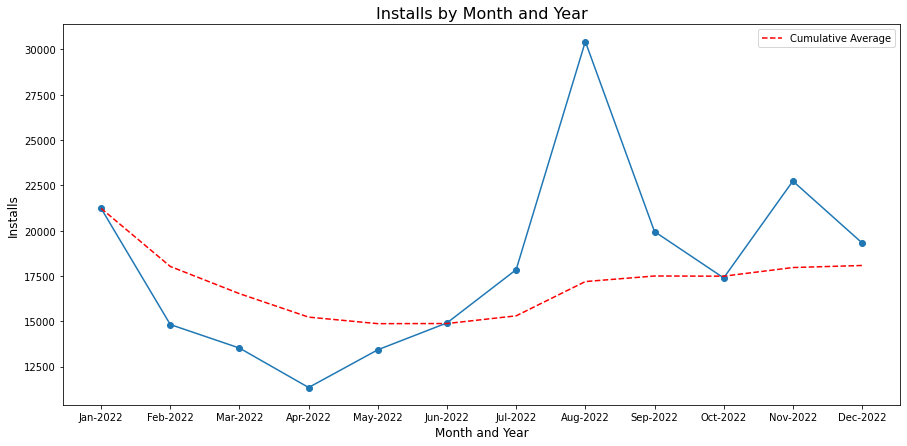

In [16]:
# Calculate cumulative average installs
cumulative_avg = monthly_installs['total_installs'].cumsum() / (monthly_installs.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(monthly_installs['month_year'], monthly_installs['total_installs'], marker='o')

# Add cumulative average line
ax.plot(monthly_installs['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('Installs by Month and Year', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('Installs', fontsize=12)

ax.legend()


plt.show()

A cumulative average chart of installs per month shows the average number of installs per month over time. In this case, the chart shows a drop in the cumulative average of installs per month early in the year, indicating that the number of installs per month was decreasing over time. However, there was a slight increase in the cumulative average of installs around August, which could mean that the number of installs started to pick up again.

However, since the chart shows that the cumulative average of installs per month has been flat from August to December, it  indicates that there has not been much change in the number of installs per month during this time. although the sharp upward and downward movement of the total installs shows that installs is relatively unstable similar to the revenue chart.

## Adspend Per Month

When a user installs one of our products through those advertisements, the network responsible for bringing us that user charges us a fee, this fee is referred to as Adspend. Ad spend per month refers to the amount of money spent on advertising on a all the networks per month. It is typically represents the expenses incurred by the company to promote its products.


In [17]:
adspend.head()

,event_date,country_id,network_id,client_id,value_usd
0,2022-01-01,1,10,71,4.680000
1,2022-01-01,1,10,94,223.439997
2,2022-01-01,1,10,104,0.800000
3,2022-01-01,1,10,121,4.870000
4,2022-01-01,1,10,174,1.300000


In [18]:
# convert event_date to datetime format
adspend['event_date'] = pd.to_datetime(adspend['event_date'])
adspend['month_year'] = adspend['event_date'].dt.to_period('M')
monthly_adspend = adspend.groupby('month_year')['value_usd'].sum().reset_index()

# Convert 'month_year' column to datetime format
monthly_adspend['month_year'] = monthly_adspend['month_year'].dt.strftime('%b-%Y')

In [19]:
monthly_adspend.head()

,month_year,value_usd
0,Jan-2022,24477.782869
1,Feb-2022,19074.084866
2,Mar-2022,18720.322028
3,Apr-2022,13238.828983
4,May-2022,15736.302006


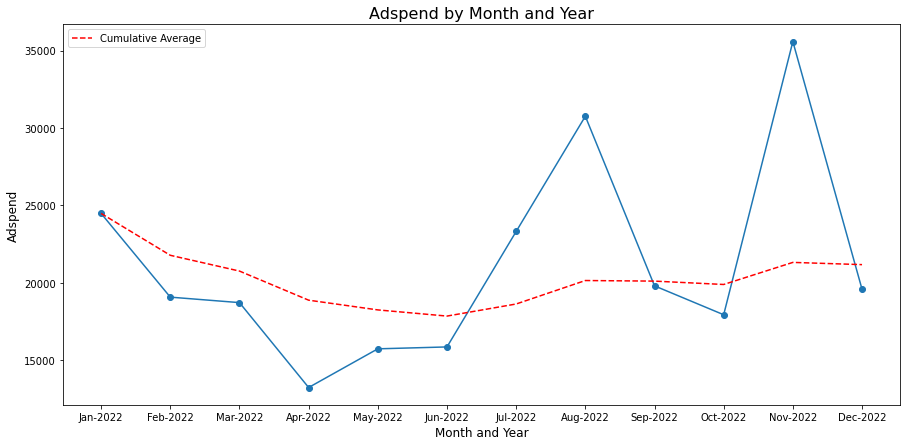

In [20]:
# Calculate cumulative average Adspend
cumulative_avg = monthly_adspend['value_usd'].cumsum() / (monthly_adspend.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(monthly_adspend['month_year'], monthly_adspend['value_usd'], marker='o')

# Add cumulative average line
ax.plot(monthly_adspend['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('Adspend by Month and Year', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('Adspend', fontsize=12)

ax.legend()


plt.show()


In this chart, the cumulative average of ad spend per month is relatively flat even though the total montly spend is unstable, it suggests that the company has probably maintained their ad budget over time.

In [21]:


# # Group installs data by month and network_id, and count the number of installs
# installs_monthly_network = installs.groupby(['month_year', 'network_id']).agg({'install_id': 'count'}).reset_index()

# # Rename the 'install_id' column to 'install_count'
# installs_monthly_network.rename(columns={'install_id': 'install_count'}, inplace=True)

# # Preview the resulting dataframe
# print(installs_monthly_network.head())


In [22]:
# installs_monthly_network.head()

# Key Performance Index to understand the financial standing of the business

## Cost per Install (CPI)


Cost per Install (CPI): This metric measures the cost of acquiring a new user by dividing the total ad spend by the number of installs in a given period. A decreasing trend in CPI indicates that the company is becoming more efficient in acquiring new users.

In [23]:
monthly_installs.head(), monthly_adspend.head()

(  month_year  total_installs
 0   Jan-2022           21224
 1   Feb-2022           14816
 2   Mar-2022           13518
 3   Apr-2022           11342
 4   May-2022           13424,
   month_year     value_usd
 0   Jan-2022  24477.782869
 1   Feb-2022  19074.084866
 2   Mar-2022  18720.322028
 3   Apr-2022  13238.828983
 4   May-2022  15736.302006)

In [24]:
# Merge monthly aggregate of installs and adspend
cpi_data = pd.merge(monthly_installs, monthly_adspend, on=['month_year'], how='left')
cpi_data.head()

,month_year,total_installs,value_usd
0,Jan-2022,21224,24477.782869
1,Feb-2022,14816,19074.084866
2,Mar-2022,13518,18720.322028
3,Apr-2022,11342,13238.828983
4,May-2022,13424,15736.302006


In [25]:
# Calculate the CPI for each month
cpi_data['cpi'] = cpi_data['value_usd'] / cpi_data['total_installs']
cpi_data.head()

,month_year,total_installs,value_usd,cpi
0,Jan-2022,21224,24477.782869,1.153307
1,Feb-2022,14816,19074.084866,1.287398
2,Mar-2022,13518,18720.322028,1.384844
3,Apr-2022,11342,13238.828983,1.167239
4,May-2022,13424,15736.302006,1.172251


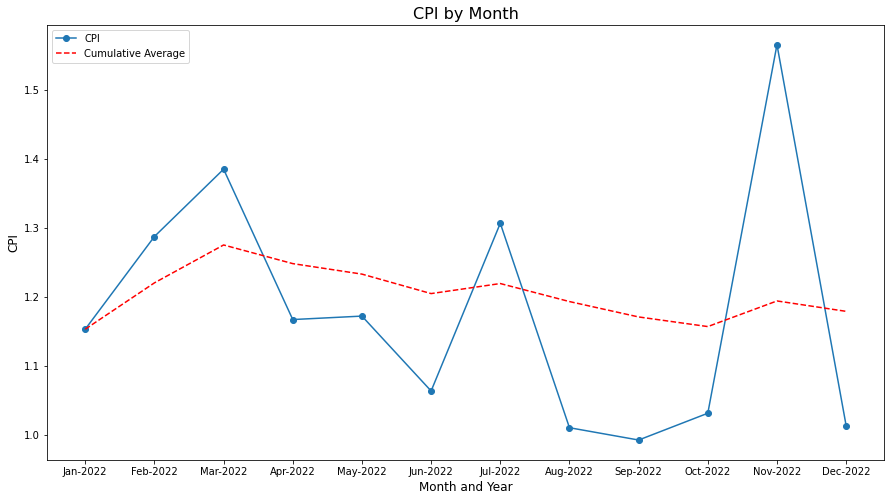

In [26]:
# Calculate cumulative average
cumulative_avg = cpi_data['cpi'].cumsum() / (cpi_data.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(cpi_data['month_year'], cpi_data['cpi'], marker='o', label='CPI')
ax.plot(cpi_data['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('CPI by Month', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('CPI', fontsize=12)

# Add legend
ax.legend()

plt.show()



This chart shows a overall decrease in the cummulative cost per install over the year. This decrease in the cumulative average of cost per install in a chart indicates that the cost of acquiring a new user has reduced over time. The cumulative average is the sum of all the costs divided by the total number of installs, which gives an average cost per install. A decrease in this value means that either the marketing campaigns have become more effective in targeting potential users, or the cost of advertising has decreased. This shows the company is moving in the right direction in this case.

## Revenue Per Install

Revenue per Install (RPI): This KPI measures the revenue generated per install by dividing the total revenue by the number of installs in a given period. A trend of increasing RPI suggests that the company is earning more revenue per user.

In [27]:
monthly_revenue.head()

,month_year,value_usd
0,Jan-2022,32226.471053
1,Feb-2022,32384.269403
2,Mar-2022,26813.231341
3,Apr-2022,21078.305186
4,May-2022,27870.085410


In [28]:
monthly_installs.head()

,month_year,total_installs
0,Jan-2022,21224
1,Feb-2022,14816
2,Mar-2022,13518
3,Apr-2022,11342
4,May-2022,13424


In [29]:
# Merging the RPI monthly aggregate
rpi_data = pd.merge(monthly_installs, monthly_revenue, on=['month_year'], how='left')
rpi_data.head()

,month_year,total_installs,value_usd
0,Jan-2022,21224,32226.471053
1,Feb-2022,14816,32384.269403
2,Mar-2022,13518,26813.231341
3,Apr-2022,11342,21078.305186
4,May-2022,13424,27870.085410


In [30]:
# Calculating the RPI on the monthly aggregated data
rpi_data['rpi'] = rpi_data['value_usd'] / rpi_data['total_installs']
rpi_data.head()

,month_year,total_installs,value_usd,rpi
0,Jan-2022,21224,32226.471053,1.518398
1,Feb-2022,14816,32384.269403,2.185763
2,Mar-2022,13518,26813.231341,1.983521
3,Apr-2022,11342,21078.305186,1.858429
4,May-2022,13424,27870.085410,2.076139


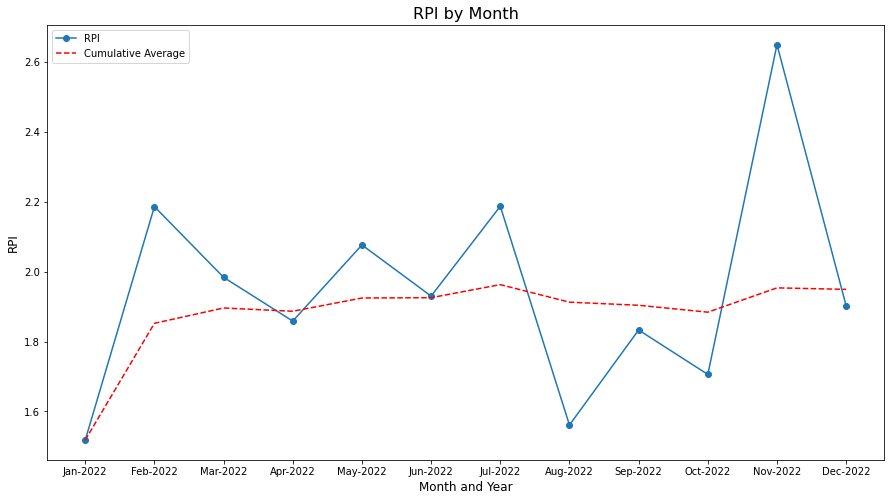

In [31]:
# Calculate cumulative average
cumulative_avg = rpi_data['rpi'].cumsum() / (rpi_data.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(rpi_data['month_year'], rpi_data['rpi'], marker='o', label='RPI')
ax.plot(rpi_data['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('RPI by Month', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('RPI', fontsize=12)

# Add legend
ax.legend()

plt.show()



The cummulative average revenue per install has been relatively flat, A flat chart of cumulative average revenue per install on a month-to-month basis suggests that the revenue generated from each new install is consistent over time. Since the revenue generated is usually depends on a combination of ‘user quality’ and ‘commercial conditions’, it shows our marketing effort is probably focused on a particular segment over the period of the chart. It could also indicate that there has not been any significant changes in the our users pool and commercial conditions over the period of observation that could impact the revenue per install. Further analysis of other factors such as changes in user behavior, product updates or competition can provide additional insights into the trends observed in the data.

## Return on Ads Spend (ROAS)

This metric measures the revenue generated from ad spend by dividing the total revenue by the total ad spend in a given period. A higher ROAS indicates that the company is generating more revenue from its ad spend.

In [32]:
monthly_revenue.head()

,month_year,value_usd
0,Jan-2022,32226.471053
1,Feb-2022,32384.269403
2,Mar-2022,26813.231341
3,Apr-2022,21078.305186
4,May-2022,27870.085410


In [33]:
monthly_adspend.head()

,month_year,value_usd
0,Jan-2022,24477.782869
1,Feb-2022,19074.084866
2,Mar-2022,18720.322028
3,Apr-2022,13238.828983
4,May-2022,15736.302006


In [34]:
roas_data = pd.merge(monthly_adspend, monthly_revenue, on=['month_year'], how='left')
roas_data.head()

,month_year,value_usd_x,value_usd_y
0,Jan-2022,24477.782869,32226.471053
1,Feb-2022,19074.084866,32384.269403
2,Mar-2022,18720.322028,26813.231341
3,Apr-2022,13238.828983,21078.305186
4,May-2022,15736.302006,27870.085410


In [35]:
roas_data['ROAS'] = roas_data['value_usd_y'] / roas_data['value_usd_x']
roas_data.head()

,month_year,value_usd_x,value_usd_y,ROAS
0,Jan-2022,24477.782869,32226.471053,1.316560
1,Feb-2022,19074.084866,32384.269403,1.697815
2,Mar-2022,18720.322028,26813.231341,1.432306
3,Apr-2022,13238.828983,21078.305186,1.592158
4,May-2022,15736.302006,27870.085410,1.771070


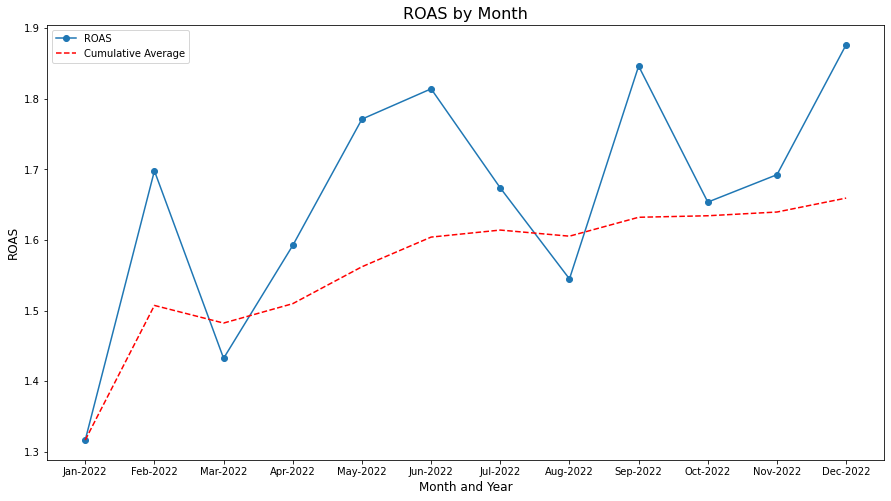

In [36]:
# Calculate cumulative average
cumulative_avg = roas_data['ROAS'].cumsum() / (roas_data.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(roas_data['month_year'], roas_data['ROAS'], marker='o', label='ROAS')
ax.plot(roas_data['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('ROAS by Month', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('ROAS', fontsize=12)

# Add legend
ax.legend()

plt.show()

ROAS (Return on Advertising Spend) is a metric that measures the revenue generated for every dollar spent on advertising. An increase in the cumulative average of ROAS month on month basis means that the revenue generated per dollar spent on advertising has been increasing over time. An increase in the cumulative average of ROAS is a positive sign for the effectiveness of advertising efforts, as it indicates that more revenue is being generated for every dollar spent on advertising, this shows the current advertising effort is yielding positive results

## Gross Margin

This metric measures the percentage of revenue that is left after deducting the payouts. A trend of increasing gross margin indicates that the company is earning more profit per unit of revenue.

In [37]:
monthly_revenue.head()

,month_year,value_usd
0,Jan-2022,32226.471053
1,Feb-2022,32384.269403
2,Mar-2022,26813.231341
3,Apr-2022,21078.305186
4,May-2022,27870.085410


In [38]:
monthly_payouts.head()

,month_year,value_usd
0,Jan-2022,4800.686502
1,Feb-2022,4127.066572
2,Mar-2022,4575.594930
3,Apr-2022,3478.259952
4,May-2022,4343.327700


In [39]:
gm_data = pd.merge(monthly_payouts, monthly_revenue, on=['month_year'], how='left')
gm_data.head()

,month_year,value_usd_x,value_usd_y
0,Jan-2022,4800.686502,32226.471053
1,Feb-2022,4127.066572,32384.269403
2,Mar-2022,4575.594930,26813.231341
3,Apr-2022,3478.259952,21078.305186
4,May-2022,4343.327700,27870.085410


In [40]:
gm_data['gross_margin'] = (gm_data['value_usd_y'] - gm_data['value_usd_x']) / gm_data['value_usd_y']
gm_data.head()

,month_year,value_usd_x,value_usd_y,gross_margin
0,Jan-2022,4800.686502,32226.471053,0.851033
1,Feb-2022,4127.066572,32384.269403,0.872560
2,Mar-2022,4575.594930,26813.231341,0.829353
3,Apr-2022,3478.259952,21078.305186,0.834984
4,May-2022,4343.327700,27870.085410,0.844158


In [41]:
gm_data.to_csv('gross_margin.csv')

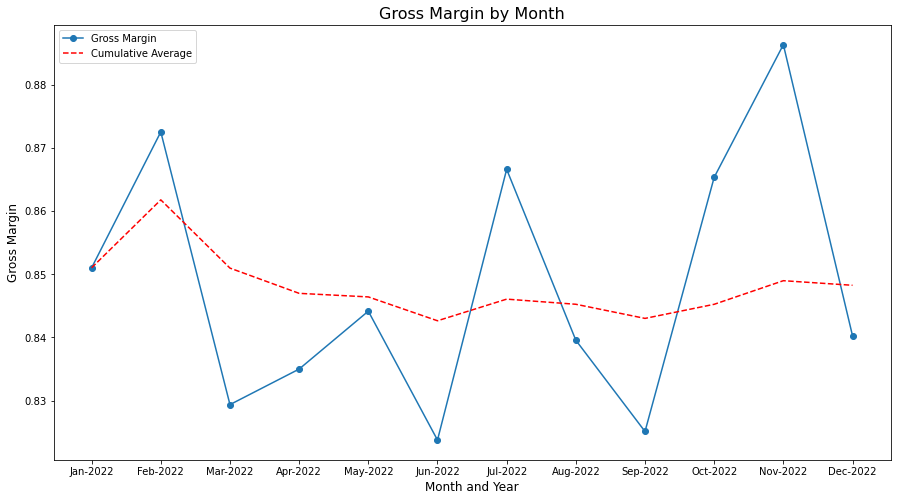

In [42]:
# Calculate cumulative average
cumulative_avg = gm_data['gross_margin'].cumsum() / (gm_data.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(gm_data['month_year'], gm_data['gross_margin'], marker='o', label='Gross Margin')
ax.plot(gm_data['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('Gross Margin by Month', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('Gross Margin', fontsize=12)

# Add legend
ax.legend()

plt.show()

The Gross Margins has been relatively flat over the period of observation

A flat gross margin means that the percentage of revenue left after deducting the payout has remained constant over a certain period of time. This indicates that the company's revenue growth is being offset by a corresponding increase in the payout, resulting in no change in the gross margin.

A flat gross margin is not necessarily a bad thing, but it does indicate that the company needs to focus on reducing costs or increasing revenue in order to improve profitability. It is important for us to monitor their gross margin over time and take action if it remains flat for an extended period of time.

### How ROAS and Gross Margin Relate

Gross margin is calculated as the difference between revenue and the cost of goods sold (COGS), divided by revenue.

An increase in ROAS means that the company is generating more revenue for each dollar spent on advertising. This increase in revenue would normally lead to an increase in gross margin, as revenue increases while the payouts remains constant. However, if the payout is also increasing at the same rate as revenue, then the gross margin would remain flat even with an increase in ROAS.

Therefore, it's possible that the increase in ROAS is being offset by an increase in the payout, resulting in a flat gross margin.

## Net Profit, Net Profit Margin and Return on Investment (ROI)


Net Profit is the amount of money left over after all expenses have been deducted from the total revenue. It is a measure of the profitability of a business and is often used as an indicator of financial health.

Net Profit Margin is a measure of profitability that calculates the percentage of revenue that is left after all expenses (in this case Payouts) have been deducted. It is calculated by dividing the Net Profit by the Total Revenue.

Return on Investment (ROI) is a measure of the efficiency of an investment (adspend). It is calculated by dividing the Net Profit by the Total Investment. ROI is often used by investors to evaluate the potential return of a given investment and to compare different investment opportunities.

In [43]:
monthly_revenue.head()

,month_year,value_usd
0,Jan-2022,32226.471053
1,Feb-2022,32384.269403
2,Mar-2022,26813.231341
3,Apr-2022,21078.305186
4,May-2022,27870.085410


In [44]:
monthly_adspend.head()

,month_year,value_usd
0,Jan-2022,24477.782869
1,Feb-2022,19074.084866
2,Mar-2022,18720.322028
3,Apr-2022,13238.828983
4,May-2022,15736.302006


In [45]:
monthly_payouts.head()

,month_year,value_usd
0,Jan-2022,4800.686502
1,Feb-2022,4127.066572
2,Mar-2022,4575.594930
3,Apr-2022,3478.259952
4,May-2022,4343.327700


In [46]:
# merge monthly aggregate of revenue and adspend
temp_data = pd.merge(monthly_revenue, monthly_adspend, on=['month_year'], how='left')

In [47]:
temp_data.head()

,month_year,value_usd_x,value_usd_y
0,Jan-2022,32226.471053,24477.782869
1,Feb-2022,32384.269403,19074.084866
2,Mar-2022,26813.231341,18720.322028
3,Apr-2022,21078.305186,13238.828983
4,May-2022,27870.085410,15736.302006


In [48]:
# merge the temp data and monthly aggregate of payout
profit_data = pd.merge(temp_data, monthly_payouts, on=['month_year'], how='left')

In [49]:
profit_data.head()

,month_year,value_usd_x,value_usd_y,value_usd
0,Jan-2022,32226.471053,24477.782869,4800.686502
1,Feb-2022,32384.269403,19074.084866,4127.066572
2,Mar-2022,26813.231341,18720.322028,4575.594930
3,Apr-2022,21078.305186,13238.828983,3478.259952
4,May-2022,27870.085410,15736.302006,4343.327700


In [50]:
# rename profit data column
profit_data = profit_data.rename(columns={'value_usd_x': 'revenue', 
                                          'value_usd_y': 'adspend',
                                          'value_usd': 'payout'})


In [51]:
# calculate net profit
profit_data['net_profit'] = profit_data['revenue'] - profit_data['adspend'] - profit_data['payout']

In [52]:
profit_data.head()

,month_year,revenue,adspend,payout,net_profit
0,Jan-2022,32226.471053,24477.782869,4800.686502,2948.001682
1,Feb-2022,32384.269403,19074.084866,4127.066572,9183.117966
2,Mar-2022,26813.231341,18720.322028,4575.594930,3517.314383
3,Apr-2022,21078.305186,13238.828983,3478.259952,4361.216250
4,May-2022,27870.085410,15736.302006,4343.327700,7790.455705


In [53]:
# calculate net profit margin
profit_data['net_profit_margin'] = profit_data['net_profit'] / profit_data['revenue']
profit_data.head()

,month_year,revenue,adspend,payout,net_profit,net_profit_margin
0,Jan-2022,32226.471053,24477.782869,4800.686502,2948.001682,0.091478
1,Feb-2022,32384.269403,19074.084866,4127.066572,9183.117966,0.283567
2,Mar-2022,26813.231341,18720.322028,4575.594930,3517.314383,0.131178
3,Apr-2022,21078.305186,13238.828983,3478.259952,4361.216250,0.206905
4,May-2022,27870.085410,15736.302006,4343.327700,7790.455705,0.279528


In [55]:
# calculate the ROI
profit_data['roi'] = profit_data['net_profit'] / profit_data['adspend']
profit_data.head()

,month_year,revenue,adspend,payout,net_profit,net_profit_margin,roi
0,Jan-2022,32226.471053,24477.782869,4800.686502,2948.001682,0.091478,0.120436
1,Feb-2022,32384.269403,19074.084866,4127.066572,9183.117966,0.283567,0.481445
2,Mar-2022,26813.231341,18720.322028,4575.594930,3517.314383,0.131178,0.187887
3,Apr-2022,21078.305186,13238.828983,3478.259952,4361.216250,0.206905,0.329426
4,May-2022,27870.085410,15736.302006,4343.327700,7790.455705,0.279528,0.495063


In [56]:
profit_data.to_csv('profit_data.csv')

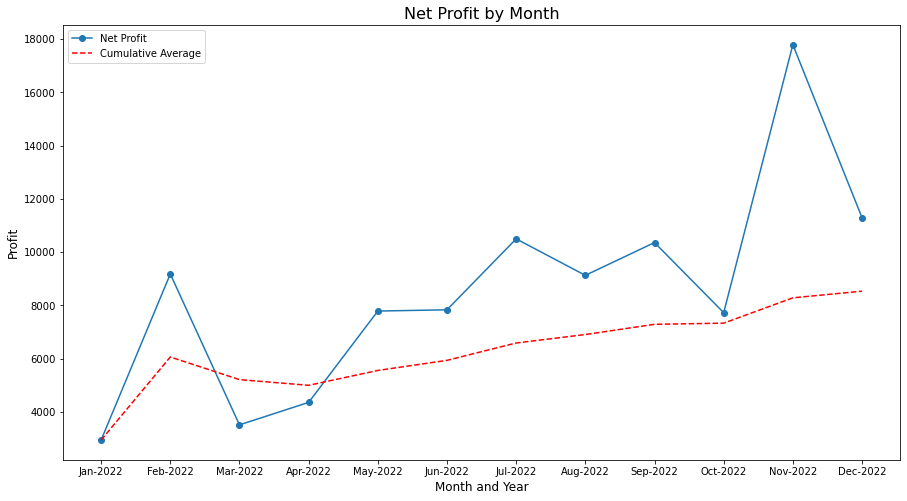

In [57]:
# Calculate cumulative average
cumulative_avg = profit_data['net_profit'].cumsum() / (profit_data.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(profit_data['month_year'], profit_data['net_profit'], marker='o', label='Net Profit')
ax.plot(profit_data['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('Net Profit by Month', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)

# Add legend
ax.legend()

plt.show()

The Cumulative average net profit increasing month on month indicates that the business is generating more profit over time. This could be due to various reasons which can be investigated with more context.

An increase in net profit means that the company is earning more than its expenses and is able to generate surplus income. This is a positive sign for the business as it indicates that it is financially stable and has the potential for growth.

However, it is important to note that looking at this metric along with other metric analysed gives a comprehensive understanding of the profitability of the business.

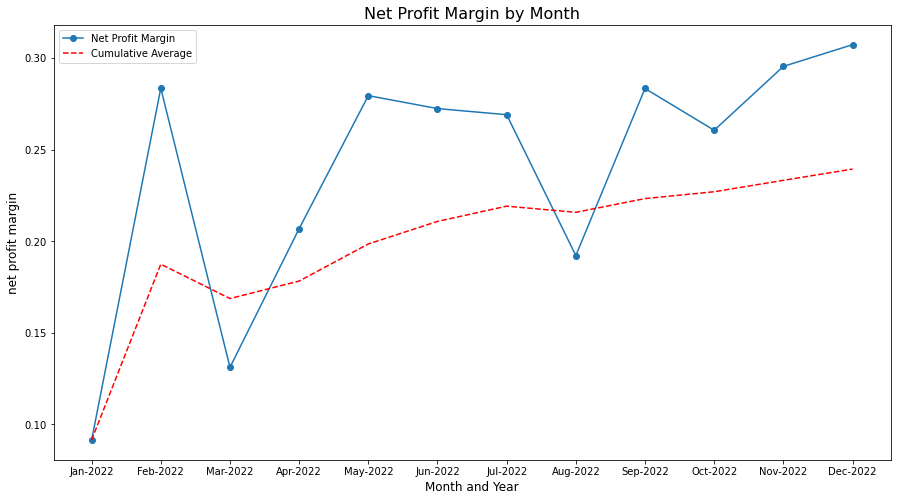

In [58]:
# Calculate cumulative average
cumulative_avg = profit_data['net_profit_margin'].cumsum() / (profit_data.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(profit_data['month_year'], profit_data['net_profit_margin'], marker='o', label='Net Profit Margin')
ax.plot(profit_data['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('Net Profit Margin by Month', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('net profit margin', fontsize=12)

# Add legend
ax.legend()

plt.show()

The Cumulative average net profit margin is a measure of profitability that indicates how much profit a company earns for every dollar of revenue it generates.

Similar to Net profit, If the cumulative average net profit margin is increasing month on month, it means that the company is becoming more profitable over time.

An increasing cumulative average net profit margin is a positive sign for a company, as it indicates that the company is becoming more efficient and profitable over time.

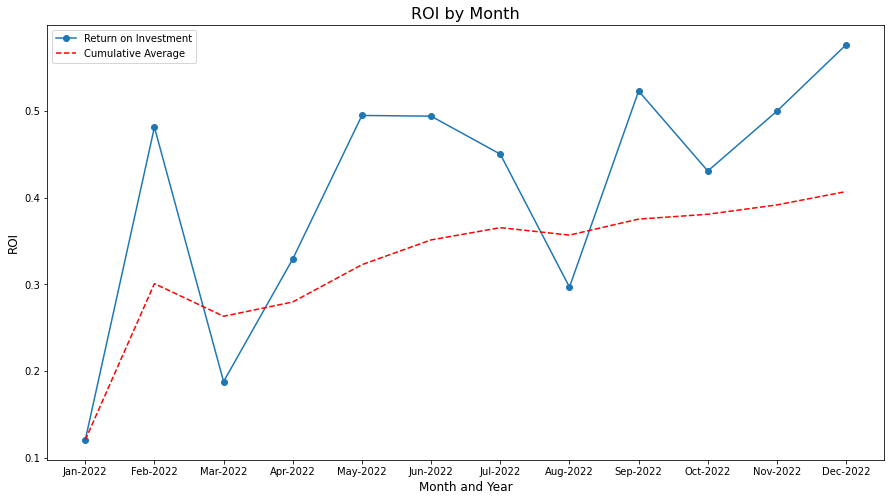

In [54]:
# Calculate cumulative average
cumulative_avg = profit_data['roi'].cumsum() / (profit_data.index + 1)

# Create line chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(profit_data['month_year'], profit_data['roi'], marker='o', label='Return on Investment')
ax.plot(profit_data['month_year'], cumulative_avg, color='r', linestyle='--', label='Cumulative Average')

# Add title and axis labels
ax.set_title('ROI by Month', fontsize=16)
ax.set_xlabel('Month and Year', fontsize=12)
ax.set_ylabel('ROI', fontsize=12)

# Add legend
ax.legend()

plt.show()

The increase in the cummulative ROI on month on month basis indicates that the company is making effective decisions in terms of its advertising strategies, which is leading to higher profits. It also suggests that the company is making efficient use of its ad spend budget (considering that the adspend has been flat), as it is generating a positive return on its investment.

Overall, an increasing ROI indicates that the company is on a positive trajectory, and its advertising efforts are yielding good results. However, it is important to continue monitoring the ROI to ensure that it stays positive and to identify areas for improvement.

## Investigate the Country and Network where most revenues are coming from

In [59]:
revenue.head()

,install_id,event_date,value_usd,month_year
0,213197bd66cd889d103ab9059709458e49808214837508...,2022-12-16,1.5800,2022-12
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,2022-12-21,6.7500,2022-12
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.6200,2022-12
3,9505bab0515c96b7d8c9a5aeb1fb28ae397b23badb2f03...,2022-12-20,0.0015,2022-12
4,fa69bdded229f9ebb18290559d77cefbd8e5ad83d74b86...,2022-12-16,0.5400,2022-12


In [60]:
installs.head()

,install_id,country_id,app_id,network_id,event_date,device_os_version
0,6b168a9f7a13119b87bfeb834d159f6879ff000205cb27...,1,174,26,2022-12-13,10
1,218ecd973c988fe76dfd247f92e9317485010844163a51...,1,174,60,2022-12-14,10
2,f67c1382fc3af8a24cb6f23bff381279d582eb67d4043e...,17,122,26,2022-12-30,11
3,afe4dc7c1663fba7ba3bc7cf6a308c38c1cb409d253f7f...,1,121,1111,2022-12-30,8.0.0
4,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11


In [69]:
# # convert event_date to datetime format
installs['event_date'] = pd.to_datetime(installs['event_date'])
installs['month_year'] = installs['event_date'].dt.to_period('M')

In [70]:
# Groupby the relevant variables
installs_grouped = installs.groupby(['network_id', 'country_id', 'month_year']).agg({'install_id': 'count'}).reset_index()

# Rename the 'install_id' column to 'install_count'
installs_grouped.rename(columns={'install_id': 'install_count'}, inplace=True)

# Preview the resulting dataframe
installs_grouped.head()

,network_id,country_id,month_year,install_count
0,10,1,2022-01,2126
1,10,1,2022-02,2092
2,10,1,2022-03,965
3,10,1,2022-04,276
4,10,1,2022-05,575


In [71]:
adspend.head()

,event_date,country_id,network_id,client_id,value_usd,month_year
0,2022-01-01,1,10,71,4.680000,2022-01
1,2022-01-01,1,10,94,223.439997,2022-01
2,2022-01-01,1,10,104,0.800000,2022-01
3,2022-01-01,1,10,121,4.870000,2022-01
4,2022-01-01,1,10,174,1.300000,2022-01


In [72]:
# Groupby the relevant variables
adspend_grouped = adspend.groupby(['network_id', 'country_id', 'month_year']).agg({'value_usd': 'sum'}).reset_index()

# Rename the 'install_id' column to 'install_count'
adspend_grouped.rename(columns={'value_usd': 'total_adspend'}, inplace=True)

# Preview the resulting dataframe
adspend_grouped.head()

,network_id,country_id,month_year,total_adspend
0,10,1,2022-01,7353.489967
1,10,1,2022-02,7506.369944
2,10,1,2022-03,3210.710035
3,10,1,2022-04,267.990004
4,10,1,2022-05,666.070008


In [74]:
# Merge the grouped data for adspend and installs
comb_df = pd.merge(adspend_grouped, installs_grouped, on=['network_id','country_id','month_year'], how='left')

In [75]:
comb_df.head()

,network_id,country_id,month_year,total_adspend,install_count
0,10,1,2022-01,7353.489967,2126
1,10,1,2022-02,7506.369944,2092
2,10,1,2022-03,3210.710035,965
3,10,1,2022-04,267.990004,276
4,10,1,2022-05,666.070008,575


In [76]:
payouts.head()

,install_id,event_date,value_usd,month_year
0,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254376,2022-12
1,7488c7b0f3d25cea61e435ea2aa346d3bbf1b946b94b1f...,2022-12-28,0.361216,2022-12
2,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.359006,2022-12
3,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416,2022-12
4,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416,2022-12


In [77]:
# Rename columns
revenue.rename(columns={'value_usd': 'total_revenue'}, inplace=True)
payouts.rename(columns={'value_usd': 'total_payouts'}, inplace=True)

#Merge the data
temp_data = pd.merge(revenue, installs, on=['install_id'], how='left')

In [78]:
temp_data.head()

,install_id,event_date_x,total_revenue,month_year_x,country_id,app_id,network_id,event_date_y,device_os_version,month_year_y
0,213197bd66cd889d103ab9059709458e49808214837508...,2022-12-16,1.5800,2022-12,17,122,26,2022-12-16,8.1.0,2022-12
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,2022-12-21,6.7500,2022-12,1,71,60,2022-12-21,12,2022-12
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.6200,2022-12,1,174,60,2022-12-21,10,2022-12
3,9505bab0515c96b7d8c9a5aeb1fb28ae397b23badb2f03...,2022-12-20,0.0015,2022-12,109,302,1111,2022-12-08,11,2022-12
4,fa69bdded229f9ebb18290559d77cefbd8e5ad83d74b86...,2022-12-16,0.5400,2022-12,1,174,60,2022-03-20,10,2022-03


In [79]:
# Merge the data
temp_data2 = pd.merge(temp_data, payouts, on=['install_id'], how='left')

In [80]:
temp_data2.head()

,install_id,event_date_x,total_revenue,month_year_x,country_id,app_id,network_id,event_date_y,device_os_version,month_year_y,event_date,total_payouts,month_year
0,213197bd66cd889d103ab9059709458e49808214837508...,2022-12-16,1.58,2022-12,17,122,26,2022-12-16,8.1.0,2022-12,NaT,NaN,NaT
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,2022-12-21,6.75,2022-12,1,71,60,2022-12-21,12,2022-12,NaT,NaN,NaT
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.62,2022-12,1,174,60,2022-12-21,10,2022-12,2022-12-21,0.710133,2022-12
3,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.62,2022-12,1,174,60,2022-12-21,10,2022-12,2022-12-21,3.571863,2022-12
4,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.62,2022-12,1,174,60,2022-12-21,10,2022-12,2022-12-23,3.583321,2022-12


In [81]:
# Select relevant columns
combined = temp_data2[['install_id', 'country_id', 'app_id', 'network_id', 'month_year_x', 'total_payouts', 'total_revenue']]

#Rename column name
combined.rename(columns={'month_year_x': 'month_year'}, inplace=True)


/Users/josepholadokun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [68]:
combined.head(5)

,install_id,country_id,app_id,network_id,month_year,total_payouts,total_revenue
0,213197bd66cd889d103ab9059709458e49808214837508...,17,122,26,2022-12,NaN,1.58
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,1,71,60,2022-12,NaN,6.75
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1,174,60,2022-12,0.710133,1.62
3,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1,174,60,2022-12,3.571863,1.62
4,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1,174,60,2022-12,3.583321,1.62


In [82]:
# Groupby the relevant columns
comb_grouped = combined.groupby(['network_id', 'country_id', 'month_year']).agg({'total_revenue': 'sum', 'total_payouts': 'sum'}).reset_index()


In [83]:
comb_grouped.head()

,network_id,country_id,month_year,total_revenue,total_payouts
0,10,1,2022-01,12178.106854,12765.192384
1,10,1,2022-02,17357.569281,12516.339838
2,10,1,2022-03,7533.133328,8576.070316
3,10,1,2022-04,2251.472201,3320.123584
4,10,1,2022-05,4845.198025,4577.766623


In [84]:
adspend

,event_date,country_id,network_id,client_id,value_usd,month_year
0,2022-01-01,1,10,71,4.680000,2022-01
1,2022-01-01,1,10,94,223.439997,2022-01
2,2022-01-01,1,10,104,0.800000,2022-01
3,2022-01-01,1,10,121,4.870000,2022-01
4,2022-01-01,1,10,174,1.300000,2022-01
...,...,...,...,...,...,...
11958,2022-12-31,109,60,121,0.297000,2022-12
11959,2022-12-31,109,60,154,0.116000,2022-12
11960,2022-12-31,109,60,174,1.457000,2022-12
11961,2022-12-31,109,60,189,0.225000,2022-12


In [85]:
# Groupby relevant variables
ads_grouped = adspend.groupby(['network_id', 'country_id', 'month_year']).agg({'value_usd': 'sum'}).reset_index()

In [86]:
# Get Data Shape
ads_grouped.shape, comb_grouped.shape

((88, 4), (144, 5))

In [87]:
# Rename column name
ads_grouped.rename(columns={'value_usd': 'total_adspend'}, inplace=True)

# Merge the data
comb_df = pd.merge(comb_grouped, ads_grouped, on=['country_id', 'network_id', 'month_year'], how='left')

In [88]:
comb_df.head()

,network_id,country_id,month_year,total_revenue,total_payouts,total_adspend
0,10,1,2022-01,12178.106854,12765.192384,7353.489967
1,10,1,2022-02,17357.569281,12516.339838,7506.369944
2,10,1,2022-03,7533.133328,8576.070316,3210.710035
3,10,1,2022-04,2251.472201,3320.123584,267.990004
4,10,1,2022-05,4845.198025,4577.766623,666.070008


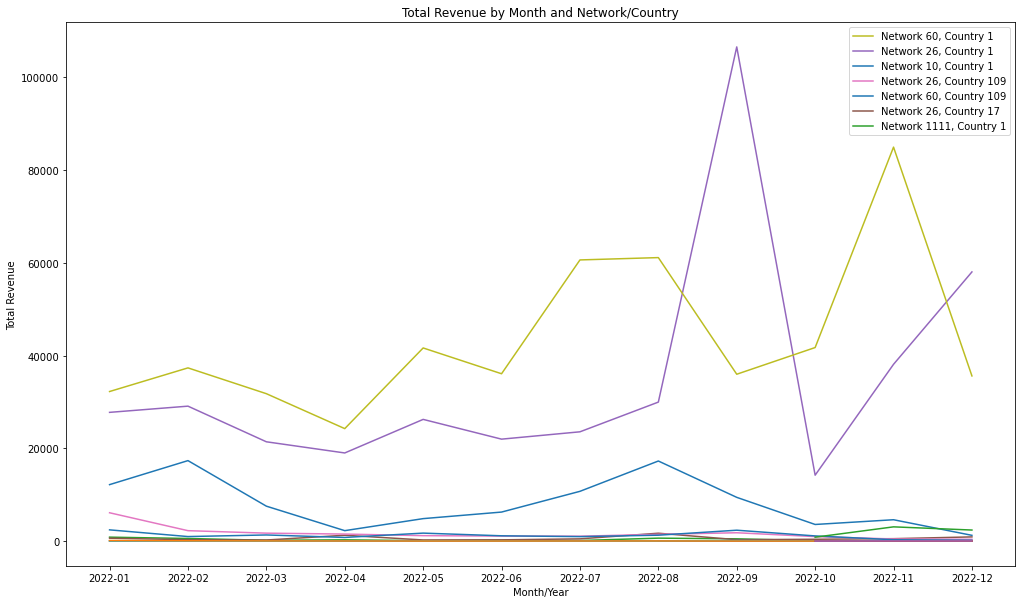

In [89]:
# group the data by network_id and country_id
groups = comb_df.groupby(['network_id', 'country_id'])

# plot the line chart for each combination of network_id and country_id
fig, ax = plt.subplots(figsize=(17, 10))
for (network_id, country_id), group in groups:

    # convert the 'month_year' column to a string
    group['month_year'] = group['month_year'].dt.strftime('%Y-%m')

    # plot the line chart for the current combination of network_id and country_id
    ax.plot(group['month_year'], group['total_revenue'], label=f'Network {network_id}, Country {country_id}')

# set the title and axis labels
ax.set_title('Total Revenue by Month and Network/Country')
ax.set_xlabel('Month/Year')
ax.set_ylabel('Total Revenue')

# sort the legend entries by descending order of total revenue and show only the top 5
handles, labels = ax.get_legend_handles_labels()
total_revenues = [group['total_revenue'].sum() for _, group in groups]
sorted_labels = [label for _, label in sorted(zip(total_revenues, labels), reverse=True)[:7]]
sorted_handles = [handle for _, handle in sorted(zip(total_revenues, handles), reverse=True)[:7]]
ax.legend(sorted_handles, sorted_labels)

# display the plot
plt.show()


From this Chart, I arranged the legend in decending order, from this chart we can see that most of our revenues are coming from Network ID 60 and Country 1 and Country 1 dominated the top 3

This gives us the idea of the network and country we should double-down on to maximise our revenues

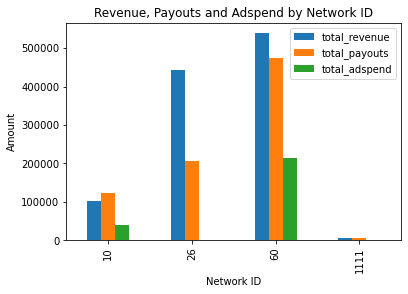

In [90]:
# group the data by network_id and sum the revenue, payouts and adspend for each network_id
comb_df2 = comb_df.drop('country_id', axis=1)

grouped_data = comb_df2.groupby(['network_id']).sum()

# plot the bar chart for the total revenue, payouts and adspend for each network_id
grouped_data.plot(kind='bar')

# set the title and axis labels
plt.title('Revenue, Payouts and Adspend by Network ID')
plt.xlabel('Network ID')
plt.ylabel('Amount')

# display the plot
plt.show()

Here, we can also see that Network ID 26 has the 2nd lowest adspend yet it's 2nd in terms of revenue generated, this also indicates that we can potentially increase our revenue massively by increasing the adspend on network ID 26. Provided all other things are constant, our revenue will massively improve

## Generating Revenue Prediction Data

In [91]:
# Preview data
comb_df.head()

,network_id,country_id,month_year,total_revenue,total_payouts,total_adspend
0,10,1,2022-01,12178.106854,12765.192384,7353.489967
1,10,1,2022-02,17357.569281,12516.339838,7506.369944
2,10,1,2022-03,7533.133328,8576.070316,3210.710035
3,10,1,2022-04,2251.472201,3320.123584,267.990004
4,10,1,2022-05,4845.198025,4577.766623,666.070008


In [92]:
# Shape of the data
comb_df.shape

(144, 6)

The data has been aggregated as we will be doing a monthly prediction

In [156]:
# Selecting the variables we will be using for prediction
pred_df = comb_df[['network_id', 'country_id', 'month_year', 'total_adspend', 'total_revenue']]

In [157]:
pred_df.head(10)

,network_id,country_id,month_year,total_adspend,total_revenue
0,10,1,2022-01,7353.489967,12178.106854
1,10,1,2022-02,7506.369944,17357.569281
2,10,1,2022-03,3210.710035,7533.133328
3,10,1,2022-04,267.990004,2251.472201
4,10,1,2022-05,666.070008,4845.198025
5,10,1,2022-06,1099.700010,6259.358692
6,10,1,2022-07,2740.719945,10733.768314
7,10,1,2022-08,6983.689985,17272.201199
8,10,1,2022-09,3834.789983,9434.117115
9,10,1,2022-10,937.890009,3584.861475


## Building the ML Model to Predict Revenue
Check the repository for the code



